In [1]:
import numpy as np  # Importing NumPy library
import pandas as pd  # Importing Pandas library
import matplotlib.pyplot as plt  # Importing Matplotlib library's "pyplot" module
import seaborn as sns  # Imorting Seaborn library
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from numpy import sqrt
import os

df= pd.read_csv("Volumetric_features.csv")
x=df.iloc[:, df.columns != 'Age']
y=df.iloc[:, 139]

X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=42)

In [2]:
lars = linear_model.Lars(n_nonzero_coefs=15)
lars.fit(X_train, y_train)

Lars(n_nonzero_coefs=15)

In [3]:
ypred = lars.predict(X_test)
mse = mean_squared_error(y_test, ypred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % sqrt(mse))

MSE: 112.03
RMSE: 10.58


In [4]:
lar_score= lars.score(X_test,y_test)
print(lar_score)

0.7268582389036384


In [6]:
lars.score(X_train,y_train)

0.717867642452992

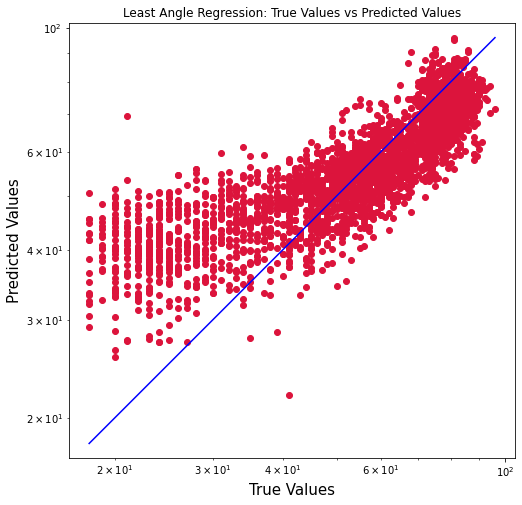

In [12]:
y_pred_train = lars.predict(X_train)
y_pred_test = lars.predict(X_test)
true_val = y_train
pred_val = y_pred_train
plt.figure(figsize=(8,8))
plt.scatter(true_val, pred_val, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(pred_val), max(true_val))
p2 = min(min(pred_val), min(true_val))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.title("Least Angle Regression: True Values vs Predicted Values")
plt.axis('equal')
plt.show()